In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [51]:
df=pd.read_csv('C:/Users/sarni/OneDrive/Desktop/projects/economic_index.csv')

In [52]:
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [53]:
### DROP UNNECESSARY COLUMN.

df.drop(columns=['Unnamed: 0','year','month'],axis=1,inplace=True)

In [54]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


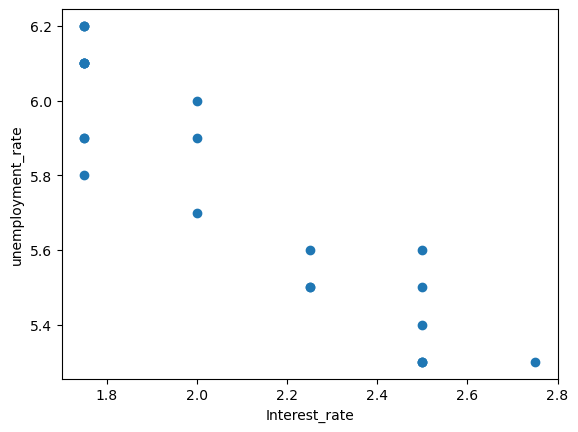

In [55]:
### VISUALIZING DATAPOINTS

import seaborn as sns

plt.scatter(df['interest_rate'],df['unemployment_rate'])
plt.xlabel('Interest_rate')
plt.ylabel('unemployment_rate')
plt.show()



In [56]:
### INDEPENDENT AND DEPENDENT FEATURE

In [57]:
X=df[['interest_rate','unemployment_rate']] # independent feature
y=df['index_price'] # dependent feature

In [58]:
### TRAIN TEST SPLIT

In [59]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [60]:
### STANDARDIZATION

In [61]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [62]:
### REGRESSION

In [63]:
from sklearn.linear_model import LinearRegression

regression=LinearRegression(n_jobs=-1)

regression.fit(X_train,y_train)


LinearRegression(n_jobs=-1)

### CROSS-VAL SCORE: A CROSS-VALIDATION FOR MODEL. DESCRIPTION IN NOTEBOOK
                    # (PART BY PART AT EACH EQUAL PARTS(GIVEN BY YOU) TRAINING AND TESTING IS DONE)

In [64]:
from sklearn.model_selection import cross_val_score

val_score=cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=3)

In [65]:
val_score

array([-4921.61331265, -7686.87497294, -5135.9962549 ])

In [66]:
np.mean(val_score)

-5914.828180162388

In [67]:
### PREDICTION

In [68]:
y_pred=regression.predict(X_test)
y_pred

array([1204.22770398,  821.65051903, 1406.51300368,  857.70889608,
        994.90992298, 1168.16932693])

### PERFORMANCE METRICS

In [77]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [78]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

5793.762887712579
59.935781523235526
76.11677139574812


In [79]:
## r-square test

from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)

0.8278978091457142


### ASSUMPTIONS

In [80]:
errors=y_test-y_pred
print(errors)

[-45.22770398 149.34948097  57.48699632  26.29110392  80.09007702
  -1.16932693]


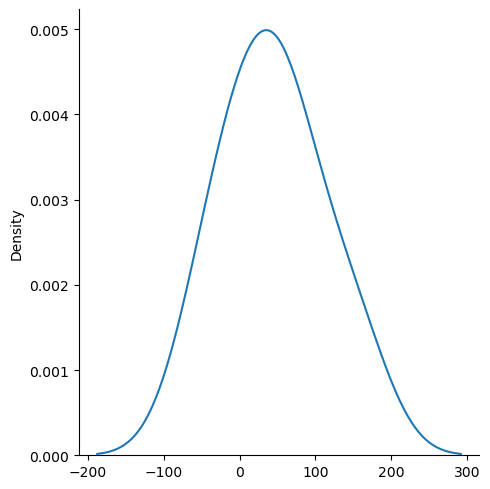

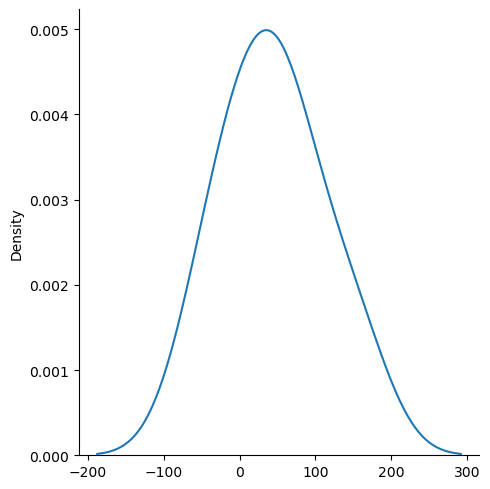

In [82]:
sns.displot(errors,kind='kde')
plt.show()

In [ ]:
### OLS

In [83]:
import statsmodels.api as sm
model=sm.OLS(y_train,X_train).fit()

In [84]:
model.summary()

c:\conda\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Sat, 24 May 2025   Prob (F-statistic):                       0.754
Time:                        14:45:38   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [85]:
print(regression.coef_)

[  88.27275507 -116.25716066]
